In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

In [106]:
df.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


In [107]:
df.describe()

,Year,Total Tested
count,212331.000000,212331.000000
mean,2015.956069,49.364200
std,0.799726,93.023576
min,2015.000000,1.000000
25%,2015.000000,5.000000
50%,2016.000000,20.000000
75%,2017.000000,57.000000
max,2017.000000,1729.000000


In [108]:
df.shape

(212331, 15)

In [109]:
df.columns

Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested', 'Mean Score', 'Number Scoring Below 65',
       'Percent Scoring Below 65', 'Number Scoring 65 or Above',
       'Percent Scoring 65 or Above', 'Number Scoring 80 or Above',
       'Percent Scoring 80 or Above', 'Number Scoring CR',
       'Percent Scoring CR'],
      dtype='object')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Mean Score                   212331 non-null  object
 7   Number Scoring Below 65      212331 non-null  object
 8   Percent Scoring Below 65     212331 non-null  object
 9   Number Scoring 65 or Above   212331 non-null  object
 10  Percent Scoring 65 or Above  212331 non-null  object
 11  Number Scoring 80 or Above   212331 non-null  object
 12  Percent Scoring 80 or Above  212331 non-null  object
 13  Number Scoring

Findings: several columns have a data type of object, but they should be numeric for proper analysis;
the Regent Exam column contains 212,321 entries, which is 10 fewer than the total number of records (212,331)

In [111]:
#convert datatype to appropriate
columns_to_convert = ['Mean Score', 'Number Scoring Below 65',
                      'Percent Scoring Below 65',
                      'Number Scoring 80 or Above',
                      'Percent Scoring 80 or Above',
                      'Number Scoring CR',
                      'Percent Scoring CR']
for col in columns_to_convert:
    # Indent this line to include it within the for loop
    df[col] = pd.to_numeric(df[col], errors='coerce')
print(df.dtypes)

School DBN                      object
School Name                     object
School Level                    object
Regents Exam                    object
Year                             int64
Total Tested                     int64
Mean Score                     float64
Number Scoring Below 65        float64
Percent Scoring Below 65       float64
Number Scoring 65 or Above      object
Percent Scoring 65 or Above     object
Number Scoring 80 or Above     float64
Percent Scoring 80 or Above    float64
Number Scoring CR              float64
Percent Scoring CR             float64
dtype: object


In [112]:
#save modyfied dataset
cleaned_df = df
cleaned_df.to_csv('cleaned_dataset.csv', index=False)

In [113]:
cleaned_df.sample(10)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
158643,08X377,Bronx Community High School,High school,Common Core English,2017,31,61.8,13.0,41.9,18,58.1,4.0,12.9,8.0,25.8
11765,19K583,Multicultural High School,High school,Common Core English,2015,95,52.4,57.0,60.0,38,40,4.0,4.2,14.0,14.7
17333,32K347,I.S. 347 School of Humanities,Junior High-Intermediate-Middle,Common Core Algebra,2015,2,NaN,NaN,NaN,s,s,NaN,NaN,NaN,NaN
125342,19K618,Academy of Innovative Technology,High school,Common Core Algebra,2017,129,66.5,49.0,38.0,80,62,9.0,7.0,54.0,41.9
76099,13K412,Brooklyn Community High School of Communicatio...,High school,Common Core Algebra2,2017,2,NaN,NaN,NaN,s,s,NaN,NaN,NaN,NaN
158723,08X405,Herbert H. Lehman High School,High school,Common Core Algebra,2015,26,65.0,8.0,30.8,18,69.2,0.0,0.0,10.0,38.5
144904,02M420,High School for Health Professions and Human S...,High school,Living Environment,2017,1,NaN,NaN,NaN,s,s,NaN,NaN,NaN,NaN
179758,17K568,Brownsville Academy High School,High school,Common Core Algebra,2017,4,NaN,NaN,NaN,s,s,NaN,NaN,NaN,NaN
34821,13K412,Brooklyn Community High School of Communicatio...,High school,Common Core Geometry,2017,77,51.3,70.0,90.9,7,9.1,0.0,0.0,0.0,0.0
90465,25Q540,Queens Academy High School,High school,Living Environment,2016,21,68.8,4.0,19.0,17,81,3.0,14.3,NaN,NaN


In [114]:
#check missing values
cleaned_df.isnull().sum()

,0
School DBN,0
School Name,0
School Level,0
Regents Exam,10
Year,0
Total Tested,0
Mean Score,75222
Number Scoring Below 65,75222
Percent Scoring Below 65,75222
Number Scoring 65 or Above,0


In [115]:
#show missing values data in the regents exam column

print(cleaned_df['Regents Exam'].isnull().sum())
(cleaned_df[cleaned_df['Regents Exam'].isnull()])

10


,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
18654,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,90,55.6,61.0,67.8,29,32.2,6.0,6.7,0.0,0.0
52756,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,81,55.9,55.0,67.9,26,32.1,5.0,6.2,0.0,0.0
52757,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,9,53.4,6.0,66.7,3,33.3,1.0,11.1,0.0,0.0
100865,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,5,NaN,NaN,NaN,s,s,NaN,NaN,NaN,NaN
100866,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,54,57.4,34.0,63.0,20,37,6.0,11.1,0.0,0.0
100867,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,31,NaN,NaN,NaN,s,s,NaN,NaN,NaN,NaN
138300,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,54,57.3,34.0,63.0,20,37,5.0,9.3,0.0,0.0
138301,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,36,53.2,27.0,75.0,9,25,1.0,2.8,0.0,0.0
209785,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,12,59.0,9.0,75.0,3,25,1.0,8.3,0.0,0.0
209786,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,78,55.1,52.0,66.7,26,33.3,5.0,6.4,0.0,0.0


In [118]:
#drop Number Scoring CR and Percent Scoring CR column where data is NaN and save new clean data frame as cleaned_df

cleaned_df = cleaned_df.dropna(subset=['Number Scoring CR', 'Percent Scoring CR'])
print(cleaned_df.isnull().sum())

School DBN                     0
School Name                    0
School Level                   0
Regents Exam                   8
Year                           0
Total Tested                   0
Mean Score                     0
Number Scoring Below 65        0
Percent Scoring Below 65       0
Number Scoring 65 or Above     0
Percent Scoring 65 or Above    0
Number Scoring 80 or Above     0
Percent Scoring 80 or Above    0
Number Scoring CR              0
Percent Scoring CR             0
dtype: int64


In [176]:
# Display rows where 'Regents Exam' is missing
(cleaned_df[cleaned_df['Regents Exam'].isnull()])

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR,Borough
18654,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,90,55.6,61.0,67.8,29,32.2,6.0,6.7,0.0,0.0,Manhattan
52756,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,81,55.9,55.0,67.9,26,32.1,5.0,6.2,0.0,0.0,Manhattan
52757,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,9,53.4,6.0,66.7,3,33.3,1.0,11.1,0.0,0.0,Manhattan
100866,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,54,57.4,34.0,63.0,20,37,6.0,11.1,0.0,0.0,Manhattan
138300,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,54,57.3,34.0,63.0,20,37,5.0,9.3,0.0,0.0,Manhattan
138301,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,36,53.2,27.0,75.0,9,25,1.0,2.8,0.0,0.0,Manhattan
209785,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,12,59.0,9.0,75.0,3,25,1.0,8.3,0.0,0.0,Manhattan
209786,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,78,55.1,52.0,66.7,26,33.3,5.0,6.4,0.0,0.0,Manhattan


Findings: Dataset doesn't contain subject names for Inwood Academy for Leadership Charter School in 2015 year.

In [122]:
#create separate column for Borough
cleaned_df['Borough'] = cleaned_df['School DBN'].str[2]
cleaned_df.sample(10)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR,Borough
52316,84M284,Harlem Children's Zone Promise Academy 1 Chart...,K-12 all grades,Common Core English,2017,108,75.7,10.0,9.3,98,90.7,48.0,44.4,64.0,59.3,M
209844,84M481,Democracy Prep Harlem Charter School,K-12 all grades,Common Core Algebra,2015,79,68.4,15.0,19.0,64,81,3.0,3.8,45.0,57.0,M
133751,29Q494,"Law, Government and Community Service High School",High school,Algebra2/Trigonometry,2015,12,42.1,10.0,83.3,2,16.7,1.0,8.3,1.0,8.3,Q
72688,11X249,Bronx Health Sciences High School,High school,Common Core Geometry,2016,104,54.8,84.0,80.8,20,19.2,0.0,0.0,10.0,9.6,X
11695,19K507,Performing Arts and Technology High School,High school,Algebra2/Trigonometry,2015,49,25.2,49.0,100.0,0,0,0.0,0.0,0.0,0.0,K
25557,05M369,Urban Assembly School for the Performing Arts,High school,Common Core Algebra,2015,88,57.1,64.0,72.7,24,27.3,0.0,0.0,6.0,6.8,M
206578,32K556,Bushwick Leaders High School for Academic Exce...,High school,Integrated Algebra,2016,10,61.3,5.0,50.0,5,50,0.0,0.0,0.0,0.0,K
108704,04M495,Park East High School,High school,Common Core English,2015,62,75.4,7.0,11.3,55,88.7,21.0,33.9,35.0,56.5,M
123567,17K745,Brooklyn Institute for Liberal Arts,High school,Common Core Algebra,2015,42,65.3,16.0,38.1,26,61.9,0.0,0.0,13.0,31.0,K
2027,02M551,Urban Assembly New York Harbor School,High school,Common Core English,2017,108,80.0,3.0,2.8,105,97.2,68.0,63.0,79.0,73.1,M


In [123]:
#convert Borough code to Borough name
borough_dict = {
    'M': 'Manhattan',
    'Q': 'Queens',
    'K': 'Brooklyn',
    'R': 'Staten Island',
    'X': 'Bronx'
}
cleaned_df['Borough'] = cleaned_df['Borough'].map(borough_dict)
cleaned_df.sample(10)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR,Borough
75240,12X479,Bronx Career and College Preparatory High School,High school,Common Core English,2017,73,66.3,23.0,31.5,50,68.5,19.0,26.0,31.0,42.5,Bronx
133013,28Q896,"Young Women's Leadership School, Queens",Secondary School,Common Core Geometry,2017,91,62.4,50.0,54.9,41,45.1,8.0,8.8,29.0,31.9,Queens
2968,04M381,Global Neighborhood Secondary School,Junior High-Intermediate-Middle,Common Core Algebra,2015,20,67.9,3.0,15.0,17,85,0.0,0.0,12.0,60.0,Manhattan
75328,12X480,Bronx Regional High School,High school,Common Core English,2017,42,58.6,22.0,52.4,20,47.6,5.0,11.9,6.0,14.3,Bronx
64528,07X379,Jill Chaifetz Transfer High School,High school,Common Core Algebra,2017,35,59.7,21.0,60.0,14,40,0.0,0.0,7.0,20.0,Bronx
19320,84X539,New Visions Charter High School for Advanced Math,High school,Common Core Algebra,2016,213,64.0,88.0,41.3,125,58.7,8.0,3.8,83.0,39.0,Bronx
187895,22K535,Leon M. Goldstein High School for the Sciences,High school,Common Core Algebra2,2017,13,74.8,2.0,15.4,11,84.6,4.0,30.8,11.0,84.6,Brooklyn
135428,31R460,Susan E. Wagner High School,High school,Common Core Geometry,2017,370,62.7,187.0,50.5,183,49.5,31.0,8.4,121.0,32.7,Staten Island
10774,17K548,Brooklyn School for Music & Theatre,High school,Integrated Algebra,2015,135,62.8,66.0,48.9,69,51.1,3.0,2.2,3.0,2.2,Brooklyn
9594,15K462,John Jay School for Law,High school,Common Core Geometry,2016,61,51.8,50.0,82.0,11,18,0.0,0.0,6.0,9.8,Brooklyn


In [130]:
cleaned_df['Borough'].value_counts()

,count
Borough,
Brooklyn,19628
Bronx,17694
Manhattan,16091
Queens,13944
Staten Island,2294


Findings: the numbers reflect the total occurences of schools in the dataset, assuming : 1) each school appears at least 3 times (one per year from 2015-2017); 2) Schools with multiple subjects tested will have multiple entries increasing their count; 3) Brooklyn has highest number of entries indicating a larger number of schools or more subject data available for those schools; 4) Staten Island has lowest number of entries suggesting fewer schools or fewer subjects tested.

In [189]:
#Actual number of unique schools per Borough, descending
unique_schools_per_borough = cleaned_df.groupby('Borough')['School Name'].nunique()
unique_schools_per_borough = unique_schools_per_borough.sort_values(ascending=False)
unique_schools_per_borough

,School Name
Borough,
Brooklyn,299
Bronx,230
Manhattan,210
Queens,170
Staten Island,29


In [191]:
#TOP performing school based on the average "Mean Score"
school_avg_scores = cleaned_df.groupby('School Name')['Mean Score'].mean()
top_school = school_avg_scores.idxmax()
top_score = school_avg_scores.max()
print(f"The top-performing school is {top_school} with an average mean score of {top_score}")






The top-performing school is The Christa McAuliffe School\I.S. 187 with an average mean score of 90.96818181818182


In [190]:
#All results for The Christa McAuliffe School
mcauliffe_schools = cleaned_df[cleaned_df['School Name'].str.contains('The Christa McAuliffe School', na=False)]
mcauliffe_schools

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR,Borough
12072,20K187,The Christa McAuliffe School\I.S. 187,Junior High-Intermediate-Middle,Common Core Algebra,2015,161,88.8,0.0,0.0,161,100,147.0,91.3,161.0,100.0,Brooklyn
12073,20K187,The Christa McAuliffe School\I.S. 187,Junior High-Intermediate-Middle,Common Core Algebra,2016,226,91.3,0.0,0.0,226,100,226.0,100.0,226.0,100.0,Brooklyn
12074,20K187,The Christa McAuliffe School\I.S. 187,Junior High-Intermediate-Middle,Common Core Algebra,2017,199,93.3,0.0,0.0,199,100,199.0,100.0,199.0,100.0,Brooklyn
41121,20K187,The Christa McAuliffe School\I.S. 187,Junior High-Intermediate-Middle,Common Core Algebra,2015,161,88.8,0.0,0.0,161,100,147.0,91.3,161.0,100.0,Brooklyn
84683,20K187,The Christa McAuliffe School\I.S. 187,Junior High-Intermediate-Middle,Common Core Algebra,2015,89,88.6,0.0,0.0,89,100,80.0,89.9,89.0,100.0,Brooklyn
84684,20K187,The Christa McAuliffe School\I.S. 187,Junior High-Intermediate-Middle,Common Core Algebra,2015,72,89.0,0.0,0.0,72,100,67.0,93.1,72.0,100.0,Brooklyn
84685,20K187,The Christa McAuliffe School\I.S. 187,Junior High-Intermediate-Middle,Common Core Algebra,2016,132,91.2,0.0,0.0,132,100,132.0,100.0,132.0,100.0,Brooklyn
84686,20K187,The Christa McAuliffe School\I.S. 187,Junior High-Intermediate-Middle,Common Core Algebra,2016,94,91.3,0.0,0.0,94,100,94.0,100.0,94.0,100.0,Brooklyn
84687,20K187,The Christa McAuliffe School\I.S. 187,Junior High-Intermediate-Middle,Common Core Algebra,2017,130,93.0,0.0,0.0,130,100,130.0,100.0,130.0,100.0,Brooklyn
84688,20K187,The Christa McAuliffe School\I.S. 187,Junior High-Intermediate-Middle,Common Core Algebra,2017,69,93.9,0.0,0.0,69,100,69.0,100.0,69.0,100.0,Brooklyn


Findings: Top performing school by average mean score is The Christa McAuliffe School\I.S. 187, which is in Brooklyn Borough and subject tested is Common Core Algebra

In [193]:
#Top performing school based on the average "Mean Score" in the Borough of Manhattan, where School Level = Junior High-Intermediate-Middle
manhattan_junior_high = cleaned_df[(cleaned_df['Borough'] == 'Manhattan') & (cleaned_df['School Level'] == 'Junior High-Intermediate-Middle')]
school_avg_scores_manhattan = manhattan_junior_high.groupby('School Name')['Mean Score'].mean()
top_school_manhattan = school_avg_scores_manhattan.idxmax()
top_score_manhattan = school_avg_scores_manhattan.max()
print(f"The top-performing Junior High-Intermediate-Middle school in Manhattan is {top_school_manhattan} with an average mean score of {top_score_manhattan}")





The top-performing Junior High-Intermediate-Middle school in Manhattan is J.H.S. 167 Robert F. Wagner with an average mean score of 90.61304347826086


In [194]:
#All results for J.H.S. 167 Robert F. Wagner school
wagner_schools = cleaned_df[cleaned_df['School Name'].str.contains('J.H.S. 167 Robert F. Wagner', na=False)]
wagner_schools

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR,Borough
384,02M167,J.H.S. 167 Robert F. Wagner,Junior High-Intermediate-Middle,Common Core Algebra,2015,98,86.9,0.0,0.0,98,100,85.0,86.7,98.0,100.0,Manhattan
385,02M167,J.H.S. 167 Robert F. Wagner,Junior High-Intermediate-Middle,Common Core Algebra,2016,98,91.0,0.0,0.0,98,100,97.0,99.0,98.0,100.0,Manhattan
386,02M167,J.H.S. 167 Robert F. Wagner,Junior High-Intermediate-Middle,Common Core Algebra,2017,96,93.4,0.0,0.0,96,100,96.0,100.0,96.0,100.0,Manhattan
20156,02M167,J.H.S. 167 Robert F. Wagner,Junior High-Intermediate-Middle,Common Core Algebra,2016,98,91.0,0.0,0.0,98,100,97.0,99.0,98.0,100.0,Manhattan
20157,02M167,J.H.S. 167 Robert F. Wagner,Junior High-Intermediate-Middle,Common Core Algebra,2017,96,93.4,0.0,0.0,96,100,96.0,100.0,96.0,100.0,Manhattan
55204,02M167,J.H.S. 167 Robert F. Wagner,Junior High-Intermediate-Middle,Common Core Algebra,2015,81,87.1,0.0,0.0,81,100,71.0,87.7,81.0,100.0,Manhattan
55205,02M167,J.H.S. 167 Robert F. Wagner,Junior High-Intermediate-Middle,Common Core Algebra,2015,17,85.9,0.0,0.0,17,100,14.0,82.4,17.0,100.0,Manhattan
55206,02M167,J.H.S. 167 Robert F. Wagner,Junior High-Intermediate-Middle,Common Core Algebra,2016,73,91.0,0.0,0.0,73,100,72.0,98.6,73.0,100.0,Manhattan
55207,02M167,J.H.S. 167 Robert F. Wagner,Junior High-Intermediate-Middle,Common Core Algebra,2016,25,91.2,0.0,0.0,25,100,25.0,100.0,25.0,100.0,Manhattan
55208,02M167,J.H.S. 167 Robert F. Wagner,Junior High-Intermediate-Middle,Common Core Algebra,2017,66,93.0,0.0,0.0,66,100,66.0,100.0,66.0,100.0,Manhattan


finding: Exam type for both schools - Common Core Algebra; Both schools have 100% pass rate, confirming that both schools are top Performing

Year
2015    88.850000
2016    91.171429
2017    93.185714
Name: Mean Score, dtype: float64


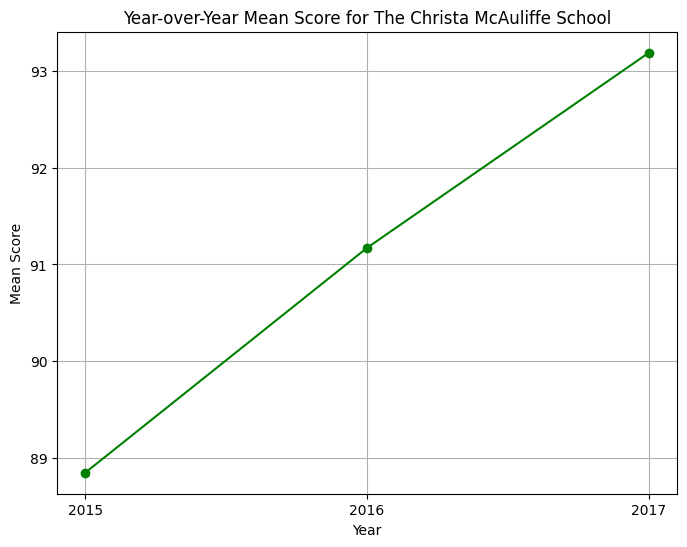

In [166]:
#Analyze the trend of Students Performance year over year by Mean Score from 2015 , 2016, 2017 for the The Christa McAuliffe School\I.S. 187 school

# Filter data for McAuliffe School and relevant years
mcauliffe_data = cleaned_df[
    (cleaned_df['School Name'] == 'The Christa McAuliffe School\I.S. 187') &
    (cleaned_df['Year'] >= 2015) & (cleaned_df['Year'] <= 2017)
]

# Group by year and calculate the mean score
year_over_year_mean = mcauliffe_data.groupby('Year')['Mean Score'].mean()
print(year_over_year_mean)

plt.figure(figsize=(8, 6))
plt.plot(year_over_year_mean.index, year_over_year_mean.values, marker='o', color='green')
plt.xticks(year_over_year_mean.index)
plt.xlabel('Year')
plt.ylabel('Mean Score')
plt.title('Year-over-Year Mean Score for The Christa McAuliffe School')
plt.grid(True)
plt.show()

Year
2015    86.814286
2016    91.037500
2017    93.512500
Name: Mean Score, dtype: float64


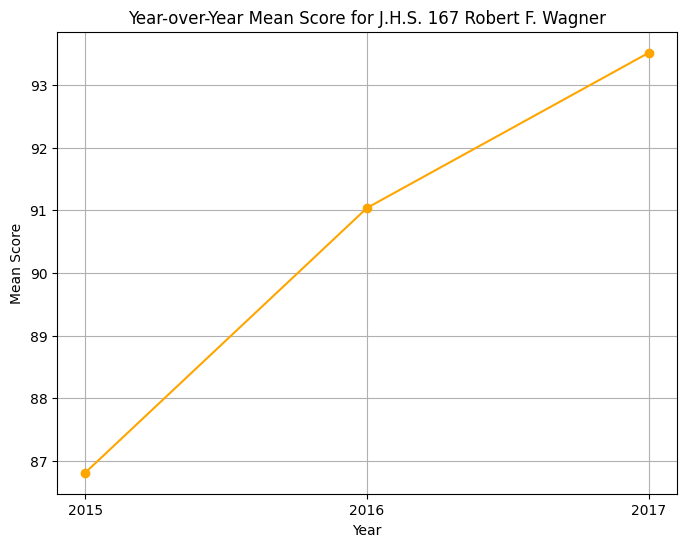

In [168]:
# Analyze year over year trend of students performance by Mean Score from 2015 , 2016, 2017 for the J.H.S. 167 Robert F. Wagner school

# Filter data for Wagner school and relevant years
wagner_data = cleaned_df[
    (cleaned_df['School Name'] == 'J.H.S. 167 Robert F. Wagner') &
    (cleaned_df['Year'] >= 2015) & (cleaned_df['Year'] <= 2017)
]

# Group by year and calculate the mean score
year_over_year_mean = wagner_data.groupby('Year')['Mean Score'].mean()
print(year_over_year_mean)

plt.figure(figsize=(8, 6))
plt.plot(year_over_year_mean.index, year_over_year_mean.values, marker='o', color='orange')
plt.xticks(year_over_year_mean.index)
plt.xlabel('Year')
plt.ylabel('Mean Score')
plt.title('Year-over-Year Mean Score for J.H.S. 167 Robert F. Wagner')
plt.grid(True)
plt.show()


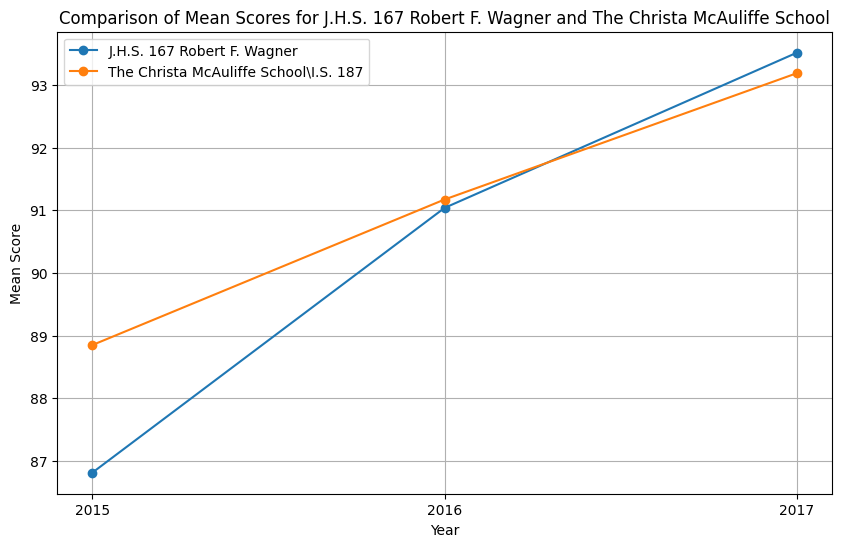

In [173]:
#Comparison of the mean score of students performance for Wagner and McAuliffe School year over year

# Combine the data for both schools into a single DataFrame
schools = ['J.H.S. 167 Robert F. Wagner', 'The Christa McAuliffe School\I.S. 187']
combined_data = cleaned_df[cleaned_df['School Name'].isin(schools) & (cleaned_df['Year'] >= 2015) & (cleaned_df['Year'] <= 2017)]

# Group by school and year to calculate the mean score
school_year_mean = combined_data.groupby(['School Name', 'Year'])['Mean Score'].mean().reset_index()

plt.figure(figsize=(10, 6))
for school in schools:
    school_data = school_year_mean[school_year_mean['School Name'] == school]
    plt.plot(school_data['Year'], school_data['Mean Score'], marker='o', label=school)

plt.xlabel('Year')
plt.ylabel('Mean Score')
plt.title('Comparison of Mean Scores for J.H.S. 167 Robert F. Wagner and The Christa McAuliffe School')
plt.xticks(school_year_mean['Year'].unique())
plt.legend()
plt.grid(True)
plt.show()

Findings: Both schools demonstrate upward trend in students performance;
The McAuliffe School started with higher mean score of ~89 in 2015
compared to Wagner with mean score of ~87.
In 2016 both schools reached similar mean score of ~91.
In 2017 Wagner school surpassed McAuliffe in mean scores reaching above 93, while McAuliffe was slightly lower.